# Ismael Hasan
## Assignment 13

**IS 362 - Dr. Charles Pak - CUNY School of Professional Studies**

Assignment – Preprocessing Data for scikit-learn

Very often, we’re tasked with taking data in one form and transforming it for easier downstream analysis. In this
assignment, you’ll use what you’ve learned in the course to prepare data for predictive analysis in Project 4.

Mushrooms Dataset. A famous—if slightly moldy—dataset about mushrooms can be found in the UCI repository
here: https://archive.ics.uci.edu/ml/datasets/Mushroom. The fact that this is such a well-known dataset in the
data science community has made it a good dataset to use for comparative benchmarking. For example, if someone
was working to build a better decision tree algorithm (or other predictive classifier) to analyze categorical data,
this dataset could be useful. In Project 4, we’ll use scikit-learn to answer the question, “Which other attribute
or attributes are the best predictors of whether a particular mushroom is poisonous or edible?”

Assignment:

> 1. First study the dataset and the associated description of the data (i.e. “data dictionary”). You may need to look around a bit, but it’s there!
> 2. Create a pandas DataFrame with a subset of the columns in the dataset. You should include the column that indicates edible or poisonous, the column that includes odor, and at least one other column of your choosing.
> 3. Add meaningful names for each column.
> 4. Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might become 0 and “p” might become 1. This is because your downstream processing in Project 4 using scikit-learn requires that values be stored as numerics.
> 5. Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.
> 6. Include some text describing your preliminary conclusions about whether either of the other columns could be helpful in predicting if a specific mushroom is edible or poisonous.

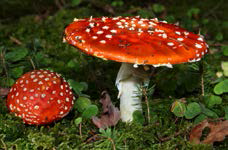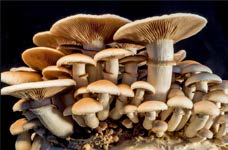

In [90]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

***Read and display Mushroom dataset (first 5 rows) and create meaningful columns***

In [91]:
mushroom_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
mushrooms = pd.read_csv(mushroom_data, header = None, usecols = [0, 5, 22], names = ['Edible', 'Odor', 'Habitat'])

mushrooms.head()

,Edible,Odor,Habitat
0,p,p,u
1,e,a,g
2,e,l,m
3,p,p,u
4,e,n,g


***Replace the codes used in the data with numeric values***

In [92]:
mushrooms.replace(to_replace={'Edible':{'e': 0, 'p': 1}}, inplace = True)
mushrooms.replace(to_replace={'Odor':{'a':0, 'l':1, 'c':2, 'y':3, 'f':4, 'm':5, 'n':6, 'p':7, 's':8}}, inplace = True)
mushrooms.replace(to_replace={'Habitat':{'g':0, 'l':1, 'm':2, 'p':3, 'u':4, 'w':5, 'd':6}}, inplace = True)

mushrooms.head()

,Edible,Odor,Habitat
0,1,7,4
1,0,0,0
2,0,1,2
3,1,7,4
4,0,6,0


***Exploratory Data Analysis*** <br> <br>
***Edible, odor, and habitat counts***

In [93]:
edible_count = mushrooms['Edible'].value_counts()
edible_count


0    4208
1    3916
Name: Edible, dtype: int64

In [94]:
odor_count = mushrooms['Odor'].value_counts()
odor_count

6    3528
4    2160
3     576
8     576
1     400
0     400
7     256
2     192
5      36
Name: Odor, dtype: int64

In [95]:
habitat_count = mushrooms['Habitat'].value_counts()
habitat_count

6    3148
0    2148
3    1144
1     832
4     368
2     292
5     192
Name: Habitat, dtype: int64

***Odor dictionary taken from [mushroom data set](https://archive.ics.uci.edu/ml/datasets/Mushroom)***<br>
> - almond = a
> - anise = l
> - creosote = c
> - fishy = y
> - foul = f
> - musty = m
> - none = n
> - pungent = p
> - spicy = s

***Plots***

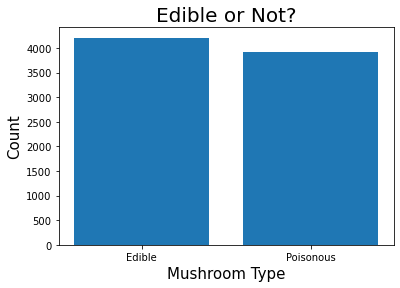

In [96]:
mushroom_type = ['Edible', 'Poisonous']
y_axis = np.arange(len(mushroom_type))
data = edible_count
plt.bar(y_axis, data, align = 'center', alpha = 1)
plt.xticks(y_axis, mushroom_type)
plt.xlabel('Mushroom Type', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Edible or Not?', fontsize = 20)

plt.show()

Text(0.5, 1.0, 'Mushroom Odors')

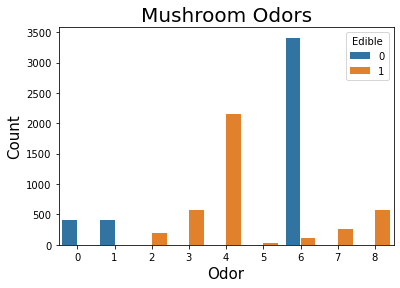

In [97]:
mushroom_odor = sns.countplot(x = 'Odor', data = mushrooms, hue = 'Edible')
plt.xlabel('Odor', size = 15)
plt.ylabel('Count', size = 15)
plt.xticks(rotation = 0)
plt.title('Mushroom Odors', fontsize = 20)

Text(16.424999999999997, 0.5, 'Odor')

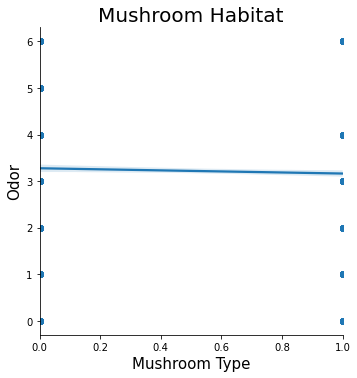

In [98]:
habitat_plot = sns.lmplot(x = 'Edible', y = 'Habitat', data = mushrooms)
plt.title('Mushroom Habitat', fontsize = 20)
plt.xlabel('Mushroom Type', size = 15)
plt.ylabel('Odor', size = 15)

***Final Analysis & Conclusion*** <br> <br>
***After analyzing the mushroom data, we can identify Odor as the most accurate indicator that will determine if the mushroom is edible or poisonous. Regarding habitat, the data is overlapping, but we can determine mushrooms will grow in all habitats. Habitat alone can not be used to identify if a mushroom is edible as each habitat contains both edible and poisonous mushrooms.*** 